In [2]:
from collections import Counter
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from sklearn import svm,model_selection, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [3]:
style.use('ggplot')

In [4]:
start=dt.datetime(2000,1,1)
end=dt.datetime(2018,10,31)

In [5]:
# pull off tesla data from yahoo finance and store into a dataframe
df= web.DataReader('TSLA', 'yahoo', start, end) 

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

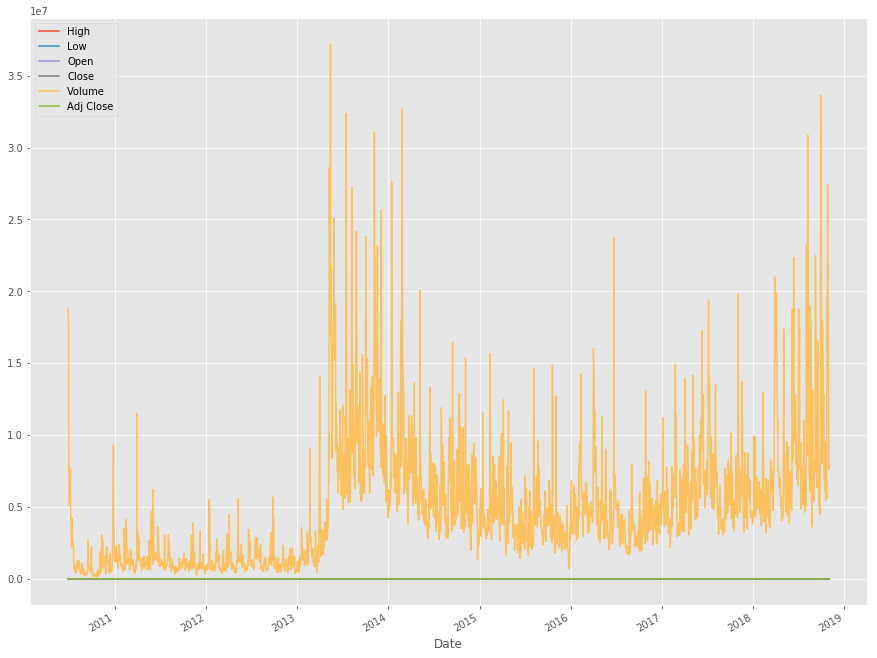

In [8]:
df.plot()
plt.show()

In [9]:
fig_size[0] = 20
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size

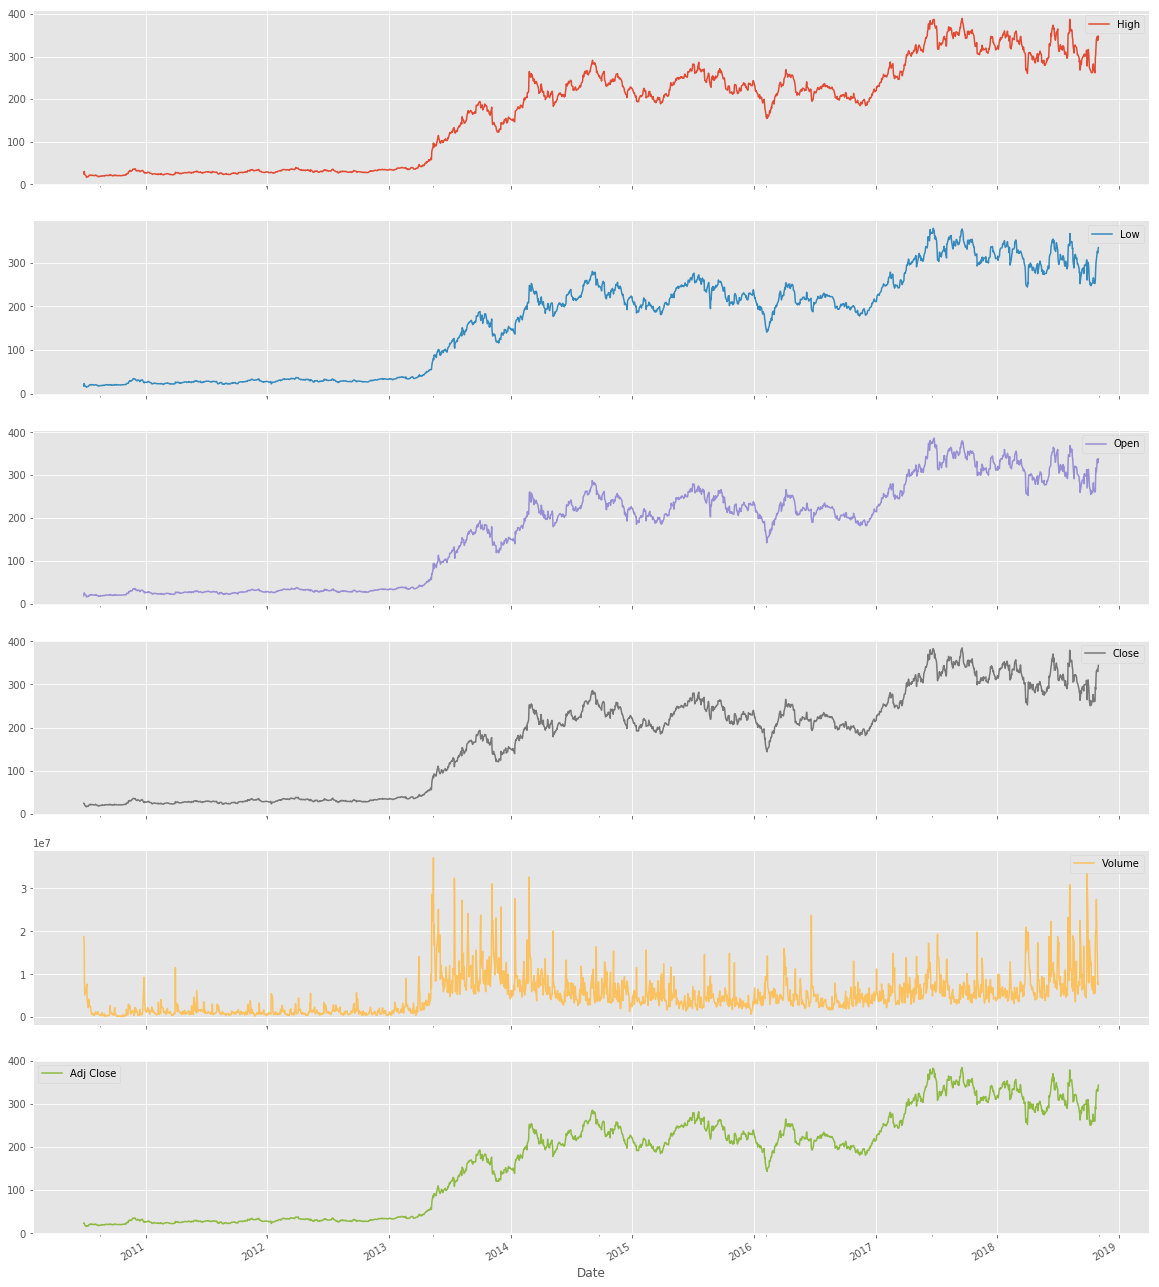

In [10]:
df.plot(subplots=True)
plt.show()

In [11]:
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [12]:
dfwithmovingaverage=df

In [13]:
dfwithmovingaverage['100ma']= df['Adj Close'].rolling(window=100,min_periods=0).mean()
dfwithmovingaverage.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


In [14]:
dfwithmovingaverage.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2018-10-26,339.899994,306.649994,308.250000,330.899994,27425500,330.899994,310.8340
2018-10-29,347.160004,326.500000,337.470001,334.850006,14486000,334.850006,311.0216
2018-10-30,337.899994,322.260010,328.390015,329.899994,9126700,329.899994,311.1440
2018-10-31,342.000000,329.100006,332.540009,337.320007,7624300,337.320007,311.1962
2018-11-01,347.839996,334.730011,338.260010,344.279999,8000100,344.279999,311.2113


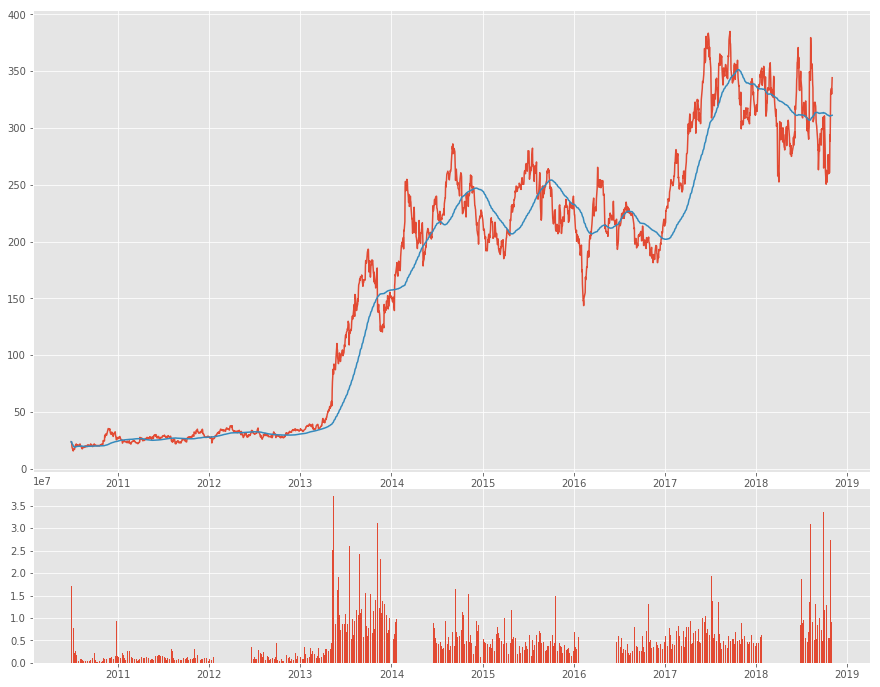

In [15]:
ax1=plt.subplot2grid((7,1),(0,0),rowspan=5, colspan=1)
ax2=plt.subplot2grid((7,1),(5,0),rowspan=2, colspan=1)

ax1.plot(dfwithmovingaverage.index,df['Adj Close'])
ax1.plot(dfwithmovingaverage.index,df['100ma'])
ax2.bar(dfwithmovingaverage.index,df['Volume'])
plt.show()

In [16]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [17]:
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()

In [18]:
df_ohlc.reset_index(inplace=True)

In [19]:
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [20]:
df_ohlc['Date']= df_ohlc['Date'].map(mdates.date2num)

In [21]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


In [22]:
fig_size[0] = 50
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size

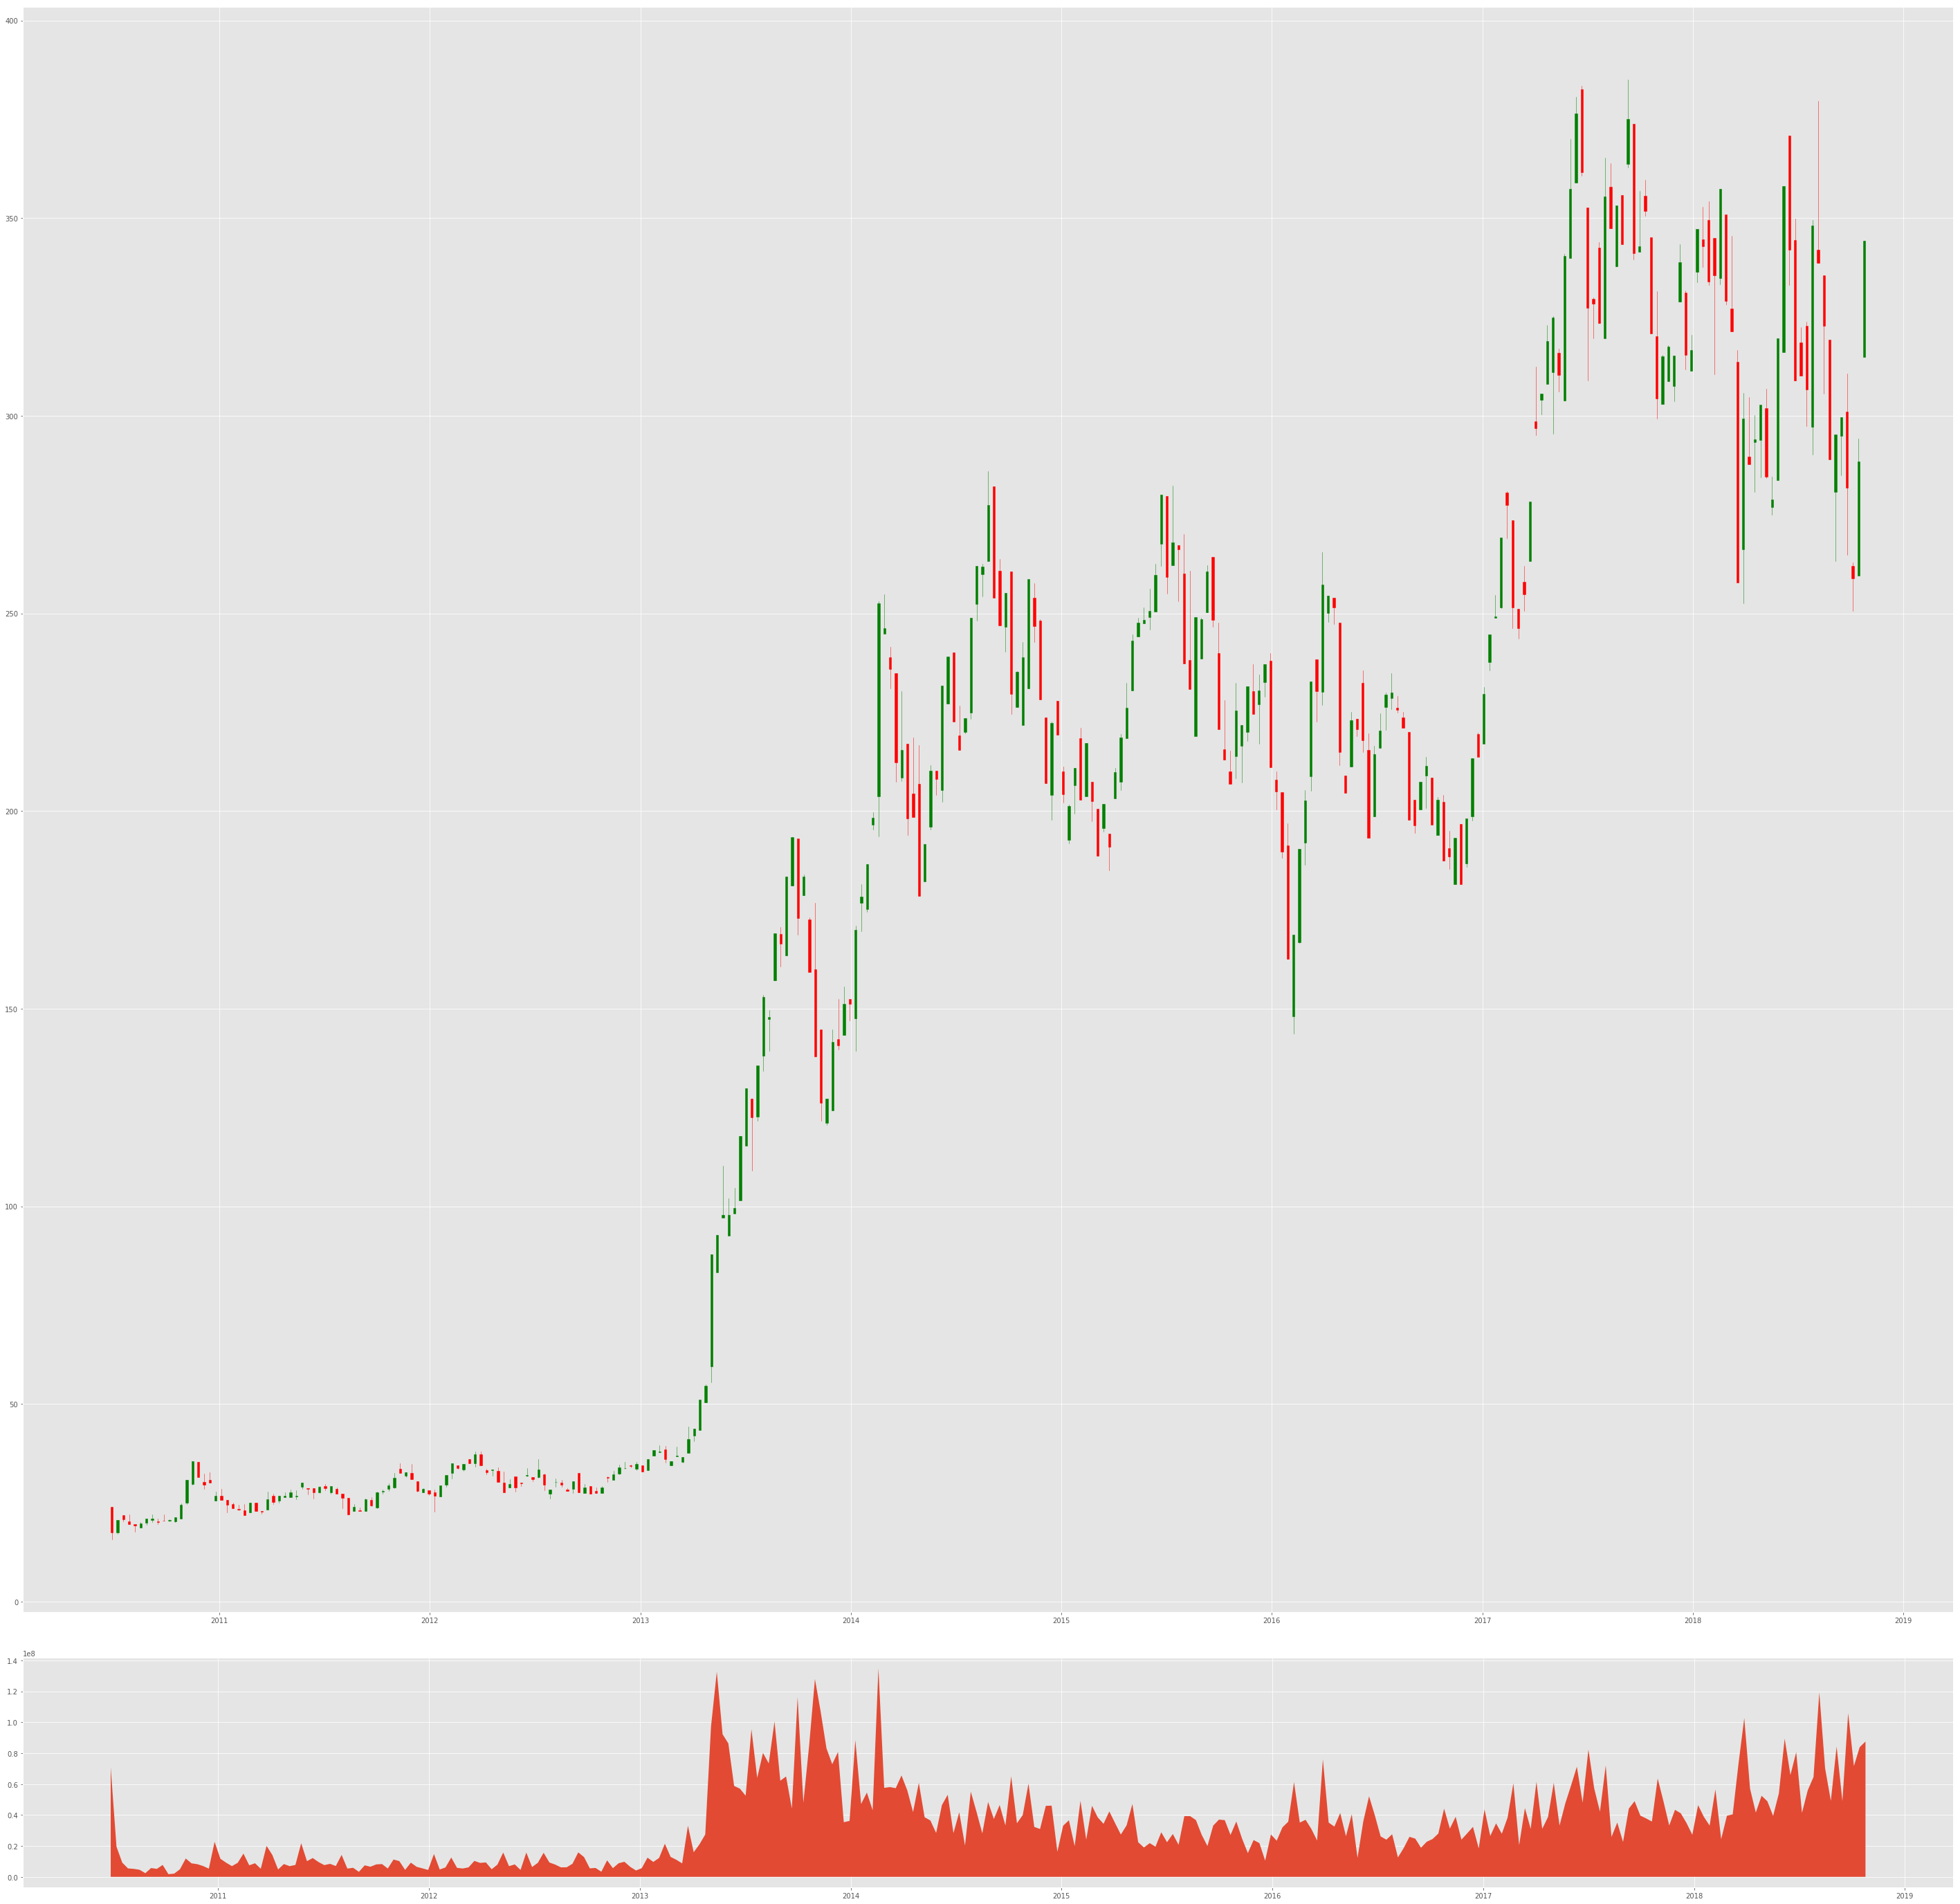

In [23]:
ax1=plt.subplot2grid((7,1),(0,0),rowspan=6, colspan=1)
ax2=plt.subplot2grid((7,1),(6,0),rowspan=1, colspan=1)

ax1.xaxis_date()
ax2.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=4, colorup='g', colordown='r')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [24]:
# Automating getting the s&p500 list

In [25]:
import bs4 as bs
import pickle
import requests
import lxml


In [26]:
def save_sp_500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,"lxml")
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.replace('.','-').strip()
        tickers.append(ticker)
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers, f)
        
    return tickers

#save_sp_500_tickers()

In [27]:
# Getting all company pricing data in the S&P 500

In [28]:
import os

In [29]:
def get_data_from_yahoo(reload_sp500=True):
    if reload_sp500: 
        tickers = save_sp_500_tickers() 
    else: 
        with open("sp500tickers.pickle", "rb") as f: 
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
            os.makedirs('stock_dfs')
               
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
            
    for ticker in tickers:
        try:
            print(ticker)
            if not os.path.exists('stocks_dfs/{}.csv'.format(ticker)):
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            else: print('Already have {}'.format(ticker)) 
                
        except: 
            print('Cannot obtain data for ' +ticker) 

get_data_from_yahoo()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
APC
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ARNC
ANET
AJG
AIZ
T
ADSK
ADP
AZO
AVB
AVY
BHGE
BLL
BAC
BK
BAX
BBT
BDX
BRK-B
BBY
BIIB
BLK
HRB
BA
BKNG
BWA
BXP
BSX
BHF
BMY
AVGO
BR
BF-B
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CAT
CBOE
CBRE
CBS
CELG
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DOV
DWDP
DTE
DRE
DUK
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
Cannot obtain data for EVRG
ES
RE
EXC
EXPE
EXPD
ESRX
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FISV
FLT
FLIR
FLS
FLR
FMC
FL
F
FTNT
FTV
FBHS
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GPN
GS
GT
GWW
HAL
HBI
HOG
HRS
HIG
HAS
HCA
HCP
HP
HSIC
HSY
HES
HPE
H

In [30]:
# combining data

In [31]:
def compile_data():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date',inplace =True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
            
        if count % 10 ==0:
            print(count)
    
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

compile_data()
            

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  27.481184  6.730005   NaN  18.25000  NaN  1.245554  16.145748   
2000-01-04  26.389219  6.537722   NaN  17.81250  NaN  1.207666  14.791295   
2000-01-05  27.153585  6.525703   NaN  18.00000  NaN  1.212402  15.083735   
2000-01-06  29.337526  6.754039   NaN  18.03125  NaN  1.188722  15.206868   
2000-01-07  29.919918  6.826150   NaN  17.93750  NaN  1.221874  15.945663   

               AMD  AAP        AES ...   WLTW  WYNN       XEL        XRX  \
Date                               ...                                     
2000-01-03  15.500  NaN  29.731331 ...    NaN   NaN  8.113840  54.889801   
2000-01-04  14.625  NaN  28.552334 ... 

In [32]:
# Visualizing correlations

In [33]:
fig_size[0] = 100
fig_size[1] = 100
plt.rcParams["figure.figsize"] = fig_size

In [34]:
def visualize_data():
    df=pd.read_csv('sp500_joined_closes.csv')
    df_corr=df.corr()
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data,cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.948626  0.917590  0.793535  0.966675  0.926923  0.930757   
ABT   0.948626  1.000000  0.870608  0.722083  0.960316  0.889726  0.878065   
ABBV  0.917590  0.870608  1.000000  0.758086  0.782810  0.740370  0.868343   
ABMD  0.793535  0.722083  0.758086  1.000000  0.860758  0.864955  0.872125   
ACN   0.966675  0.960316  0.782810  0.860758  1.000000  0.939226  0.924783   

           AMD       AAP       AES    ...         WLTW      WYNN       XEL  \
MMM  -0.521923  0.967229 -0.290799    ...     0.877940  0.659864  0.941822   
ABT  -0.601495  0.958861 -0.247201    ...     0.811535  0.737949  0.946977   
ABBV  0.188658  0.896813  0.056811    ...     0.804627 -0.303637  0.792071   
ABMD -0.247162  0.844651  0.022127    ...     0.684755  0.295920  0.830728   
ACN  -0.511405  0.963566  0.040392    ...     0.845872  0.664848  0.980970   

           XRX      XLNX       XYL       YUM       ZBH      ZI

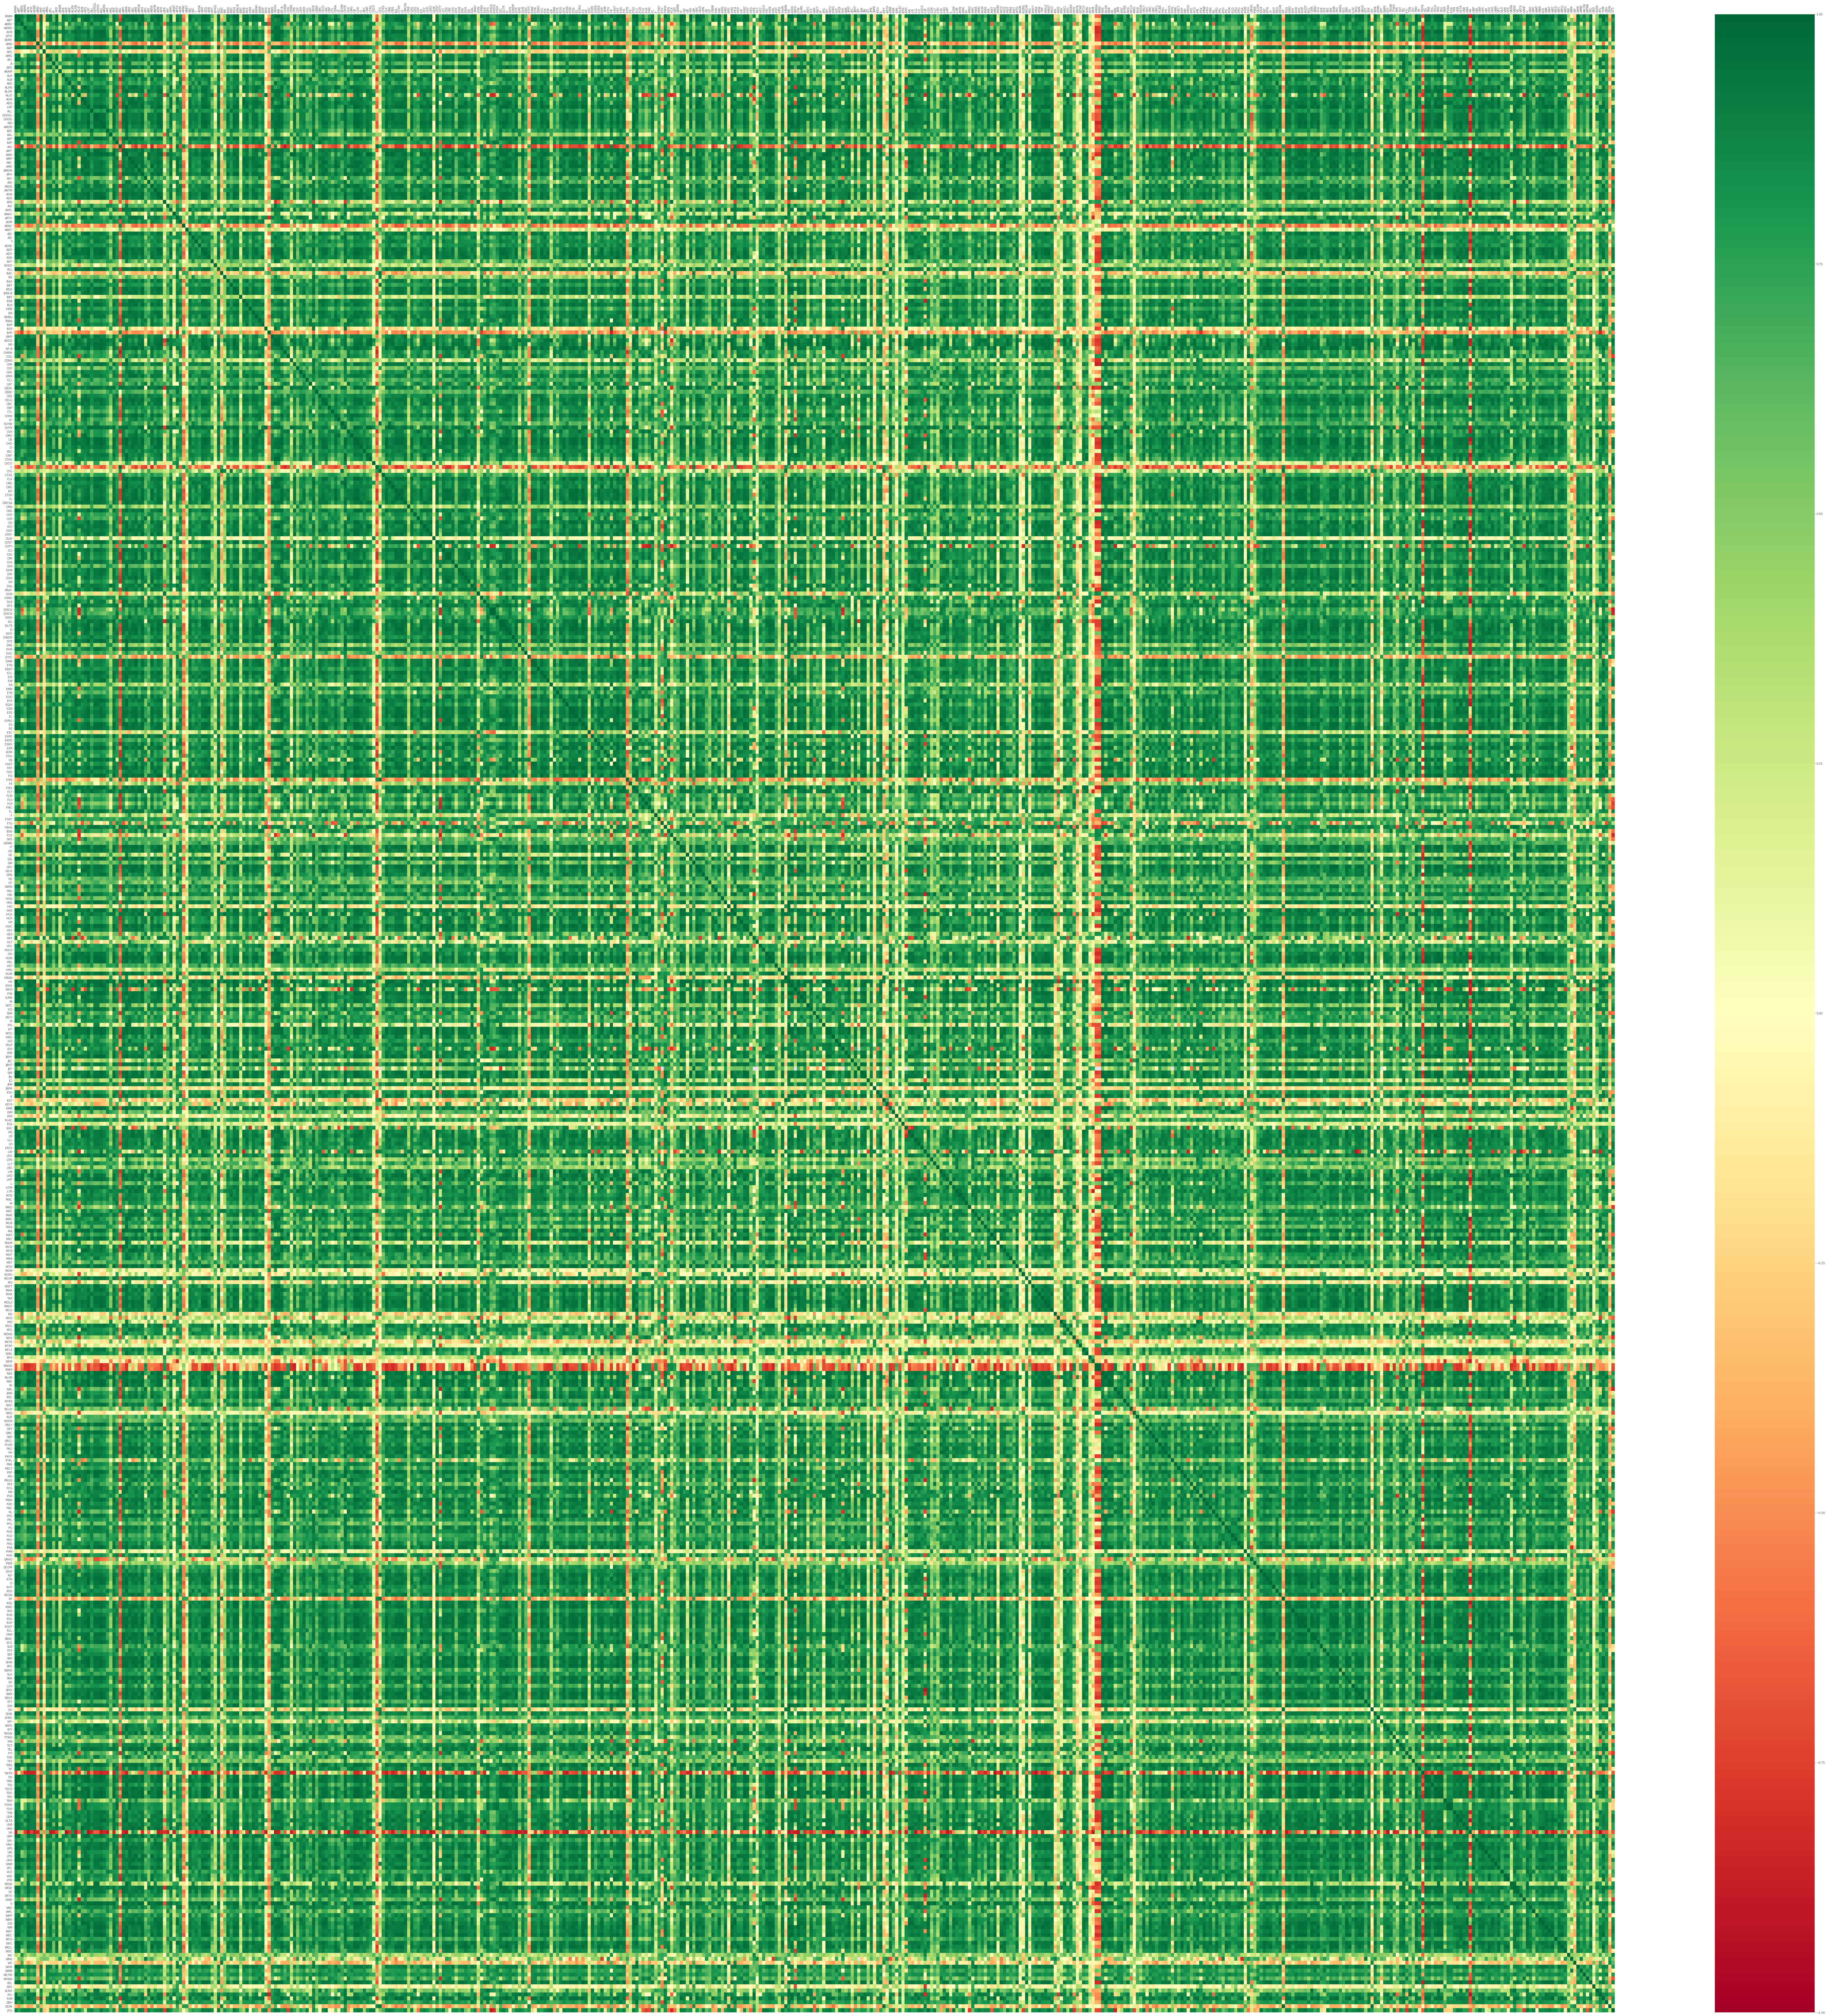

In [35]:
visualize_data()

In [36]:
# Preprocessing data for machine learning

In [37]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
        
    df.fillna(0, inplace=True)
    return tickers,df

In [38]:
# Creating machine learning target function

In [39]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.015
    for col in cols:
        if col > requirement:
            return 1       # label 1 = buy
        if col < -requirement:
            return -1      # label -1 = sell
    return 0               # label 0 = hold

In [40]:
# Creating labels for Machine Learning

In [51]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                             df['{}_1d'.format(ticker)],
                                             df['{}_2d'.format(ticker)],
                                             df['{}_3d'.format(ticker)],
                                             df['{}_4d'.format(ticker)],
                                             df['{}_5d'.format(ticker)],
                                             df['{}_6d'.format(ticker)],
                                             df['{}_7d'.format(ticker)]))
                                                
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
    df.fillna(0, inplace = True)
    df = df.replace([np.inf,-np.inf],np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker_name for ticker_name in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf,-np.inf],0)
    df_vals.fillna(0,inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df

In [52]:
extract_featuresets('GOOGL')

Data spread: Counter({'1': 1598, '0': 1364, '-1': 1315})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.039735  , -0.02857103,  0.        , ...,  0.        ,
         -0.04842357,  0.        ],
        [ 0.02896509, -0.00183829,  0.        , ...,  0.        ,
         -0.00118335,  0.        ],
        ...,
        [-0.00469483, -0.00984436, -0.00368005, ...,  0.00155497,
         -0.01479618, -0.00521221],
        [ 0.00185314,  0.00235478,  0.00738722, ...,  0.00426932,
         -0.01132175,  0.00336823],
        [ 0.00089695,  0.00261008, -0.00175351, ..., -0.00289849,
          0.00584252, -0.00167846]]),
 array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2000-01-03   27.481184   6.730005   0.000000   18.250000    0.000000   
 2000-01-04   26.389219   6.537722   0.000000   17.812500    0.000000   
 2000-01-05   27.153585   6.5

In [43]:
# Perform Machine learning

In [46]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)
    
    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                           ('knn',neighbors.KNeighborsClassifier()),
                           ('rfor', RandomForestClassifier())])
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy',confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return confidence

In [55]:
do_ml('NFLX')

Data spread: Counter({'1': 1933, '-1': 1698, '0': 646})


C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 0.45224719101123595
Predicted spread: Counter({-1: 528, 1: 527, 0: 13})


0.45224719101123595

Data spread: Counter({'1': 1982, '-1': 1848, '0': 447})


C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\linear_model\logisti

LR: 0.451750 (0.061836)


C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variabl

LDA: 0.424154 (0.040147)
KNN: 0.422284 (0.043735)
CART: 0.417833 (0.043561)
NB: 0.330317 (0.089271)


C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\deepakdamera\Anaconda3\lib\site-packages\sklearn\

SVM: 0.463434 (0.070504)


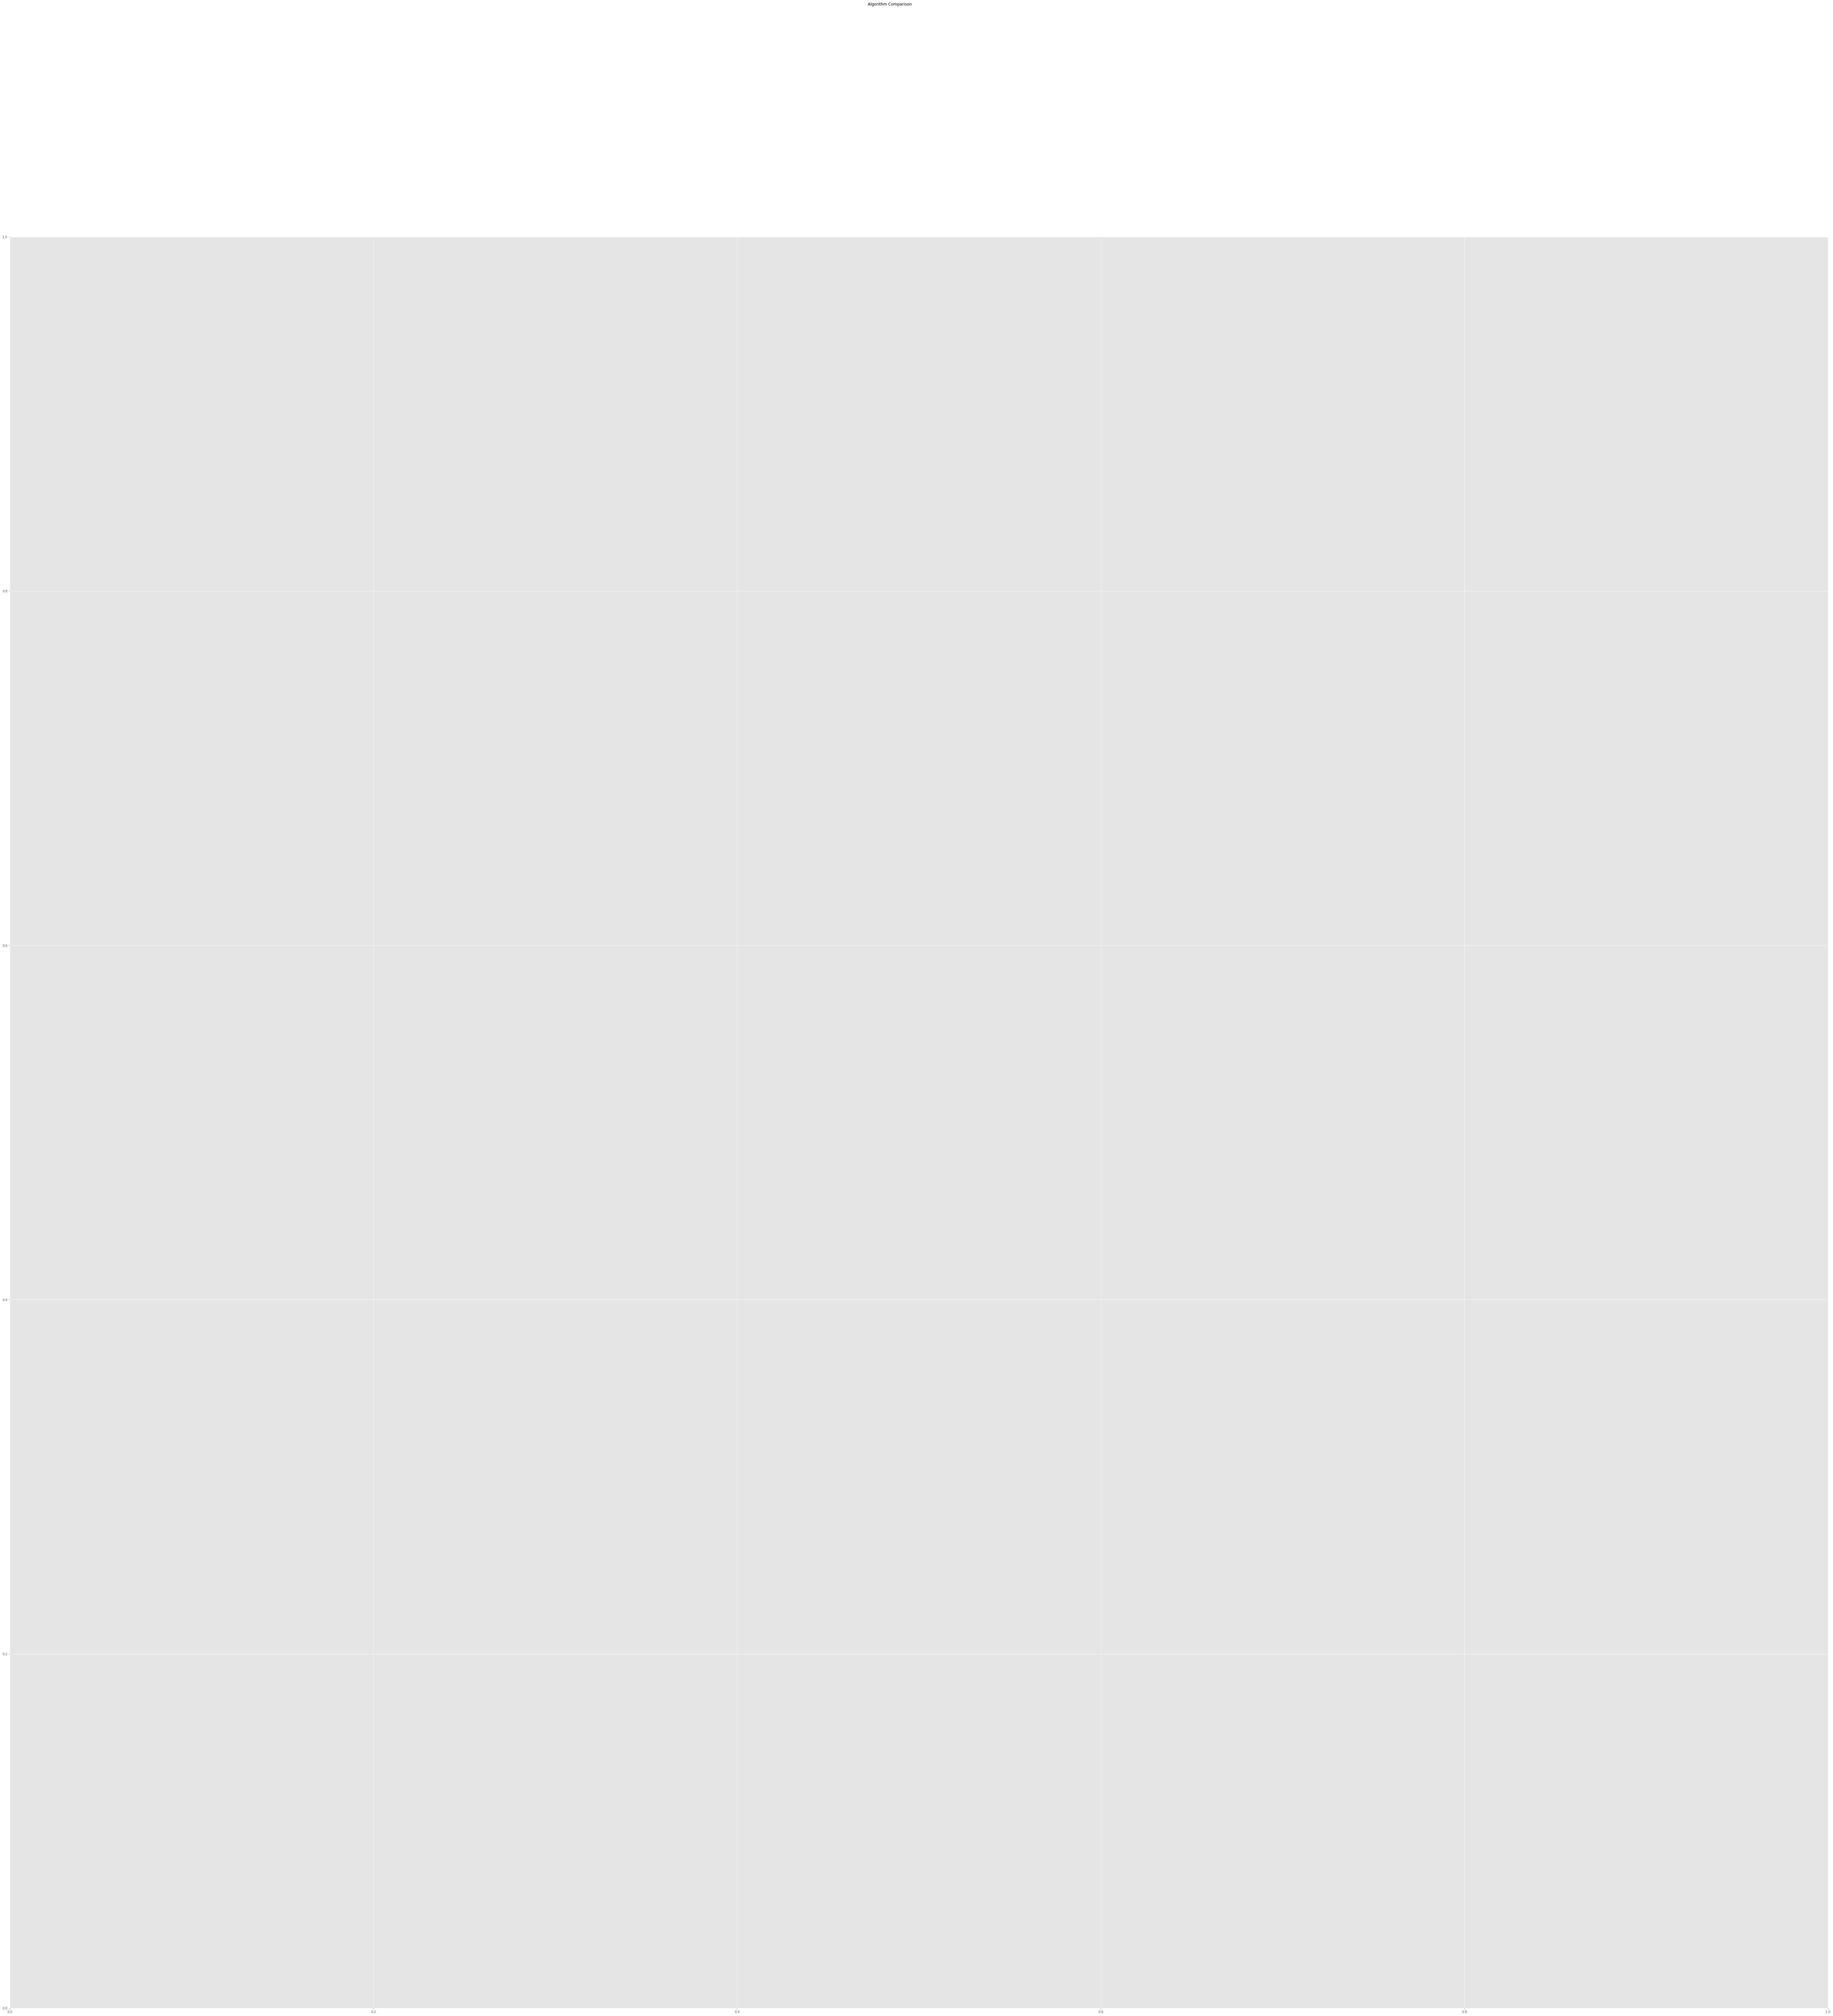

In [56]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
X, y, df = extract_featuresets('BAC')
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results)
#ax.set_xticklabels(names)
#plt.show()


